<a href="https://colab.research.google.com/github/MudSnail/Colab_Practice/blob/main/LHL%20Final/Mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Shape files retrieved from:
#https://mapcruzin.com/free-canada-british-columbia-arcgis-maps-shapefiles.htm

In [ ]:
!pip install geopandas
!pip install pyshp

In [2]:
# import geopandas and matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt
import fiona
import pandas as pd
import plotly.express as px
from shapely.geometry import Polygon, LineString, shape, mapping
import warnings
warnings.filterwarnings('ignore')

In [ ]:
file = r"/content/drive/MyDrive/Deep_Learning/Project/british_columbia_coastline/british_columbia_coastline.shp"
output = r"/content/drive/MyDrive/Deep_Learning/Project/british_columbia_coastline/output.shp"


schema = {
    'geometry': 'Polygon',
    'properties' : {'id':'int'}
}

with fiona.open(file) as in_file, fiona.open(output, 'w', 'ESRI Shapefile', schema) as out_file:
    for index_line, row in enumerate(in_file):
        line = shape(row['geometry'])
        coordinates = []

        if isinstance(line, LineString):
            for index, point in enumerate(line.coords):
                if index == 0:
                    first_pt = point
                coordinates.append(point)

            coordinates.append(first_pt)
            if len(coordinates) >= 3:
                polygon = Polygon(coordinates)
                print(polygon)
                out_file.write({
                    'geometry': mapping(polygon),
                    'properties': {'id': index_line},
                })

In [3]:
# open new shapefile
data = gpd.read_file('/content/drive/MyDrive/Deep_Learning/Project/british_columbia_coastline/output.shp')
data.head()

,id,geometry
0,0,"POLYGON ((-139.04610 59.85247, -138.91977 59.8..."
1,1,"POLYGON ((-138.98169 59.80696, -139.03678 59.8..."
2,2,"POLYGON ((-138.91977 59.81393, -138.91671 59.8..."
3,3,"POLYGON ((-138.32211 59.07474, -138.32215 59.0..."
4,4,"POLYGON ((-138.30883 59.06012, -138.30887 59.0..."


In [ ]:
#load data
df = pd.read_csv('/content/drive/MyDrive/Deep_Learning/Project/locationaccuracy_eda.csv', 
                 usecols=['LatitudeDD','LongitudeDD','SpeciesCategory',
                           'Location Accuracy', 'Year', 'Month', 'Season'])
#Check Data
df.head()

In [ ]:
#create geopandas
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LongitudeDD,df.LatitudeDD))
gdf.head()

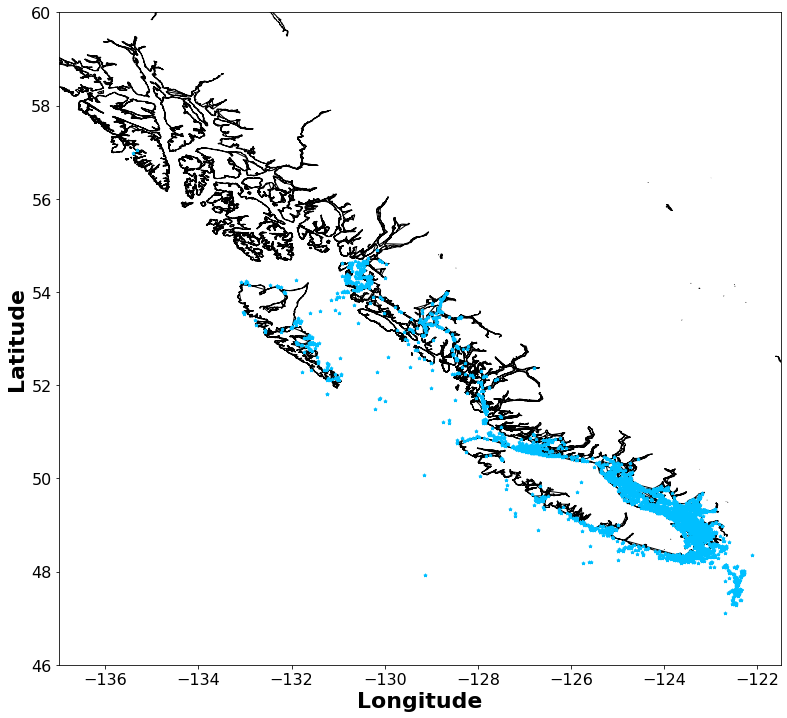

In [8]:
# create figure and axes
fig, ax = plt.subplots(figsize = (15,12))

# create map from world_filtered data-frame
base = data.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=base, marker='*', color='deepskyblue',markersize=10)

#set limit
plt.xlim([-137, -121.5])
plt.ylim([46,60])
plt.ylabel('Latitude',fontsize = 22, weight='bold')
plt.xlabel('Longitude', fontsize = 22, weight='bold')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

#save plot
fig= base.get_figure()
fig.savefig('/content/drive/MyDrive/Deep_Learning/Project/sightingslocations.png')

Sightings data supplied by the B.C. Cetacean Sightings Network. Sightings are opportunistic and not corrected for effort.